# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import os

if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

In [3]:
A = cv2.imread("100zloty.jpg", cv2.IMREAD_COLOR)
I = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

In [4]:
def array2plt(src):
    plt.imshow(src)
    plt.xticks([]), plt.yticks([])
    plt.gray()
    plt.show()

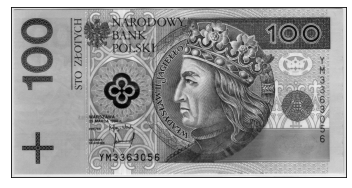

In [5]:
array2plt(I)

In [6]:
bit_plane = np.array([I] * 8)
for i in range(8):
    bit_plane[i] //= 2**i
    bit_plane[i] %= 2
bit_plane = np.flipud(bit_plane).astype('bool')

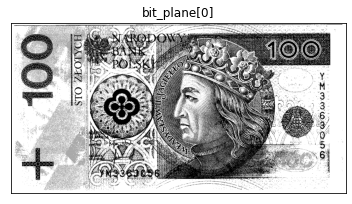

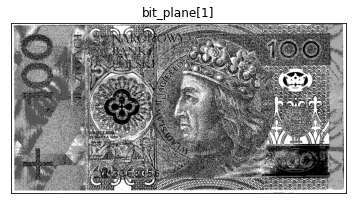

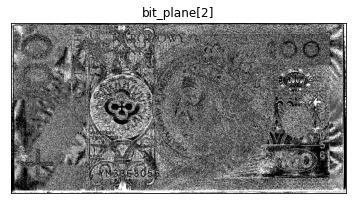

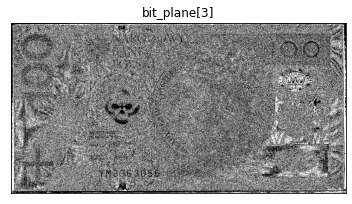

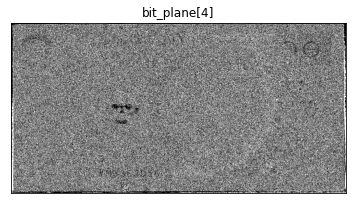

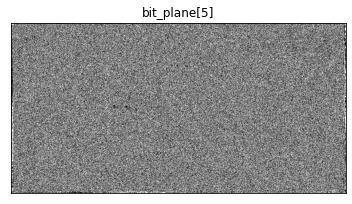

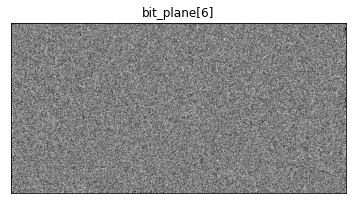

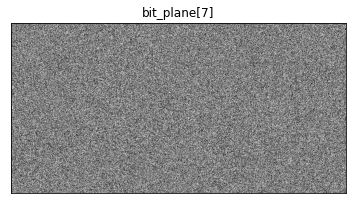

In [7]:
for i in range(8):
    plt.title('bit_plane[' + str(i) + ']')
    array2plt(bit_plane[i])

In [8]:
# format "layers":
# - warstwy w kolejności rosnącej
# - zakres [0-7]
def recreate_img(layers : str):
    image = np.zeros_like(I)
    
    levels = list(layers)
    for c, level in enumerate(levels):
        levels[c] = int(level)
        if not 0<=levels[c]<=7:
            raise Exception('layers not in [0-8]')
        elif c > 0 and not levels[c-1] < levels[c]:
            raise Exception('layers not in ascending order')
    
    for level in levels:
        image += np.uint8(bit_plane[level])*(2**(7-level))
    
    image *= 2**int(levels[0])
    
    return image

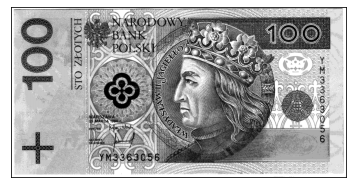

In [9]:
array2plt(recreate_img('01'))

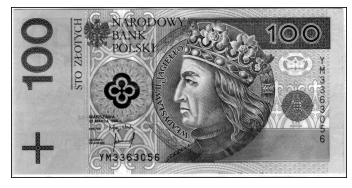

In [10]:
array2plt(recreate_img('012'))

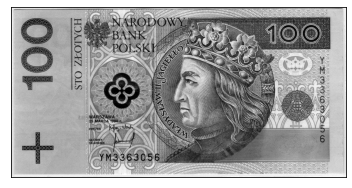

In [11]:
array2plt(recreate_img('0123'))

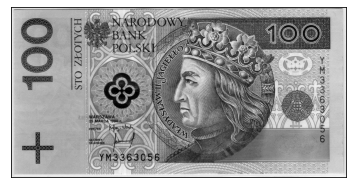

In [12]:
array2plt(recreate_img('01234'))

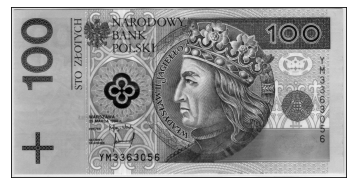

In [13]:
array2plt(recreate_img('012345'))

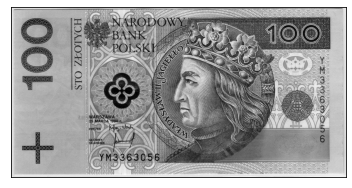

In [14]:
array2plt(recreate_img('0123456'))

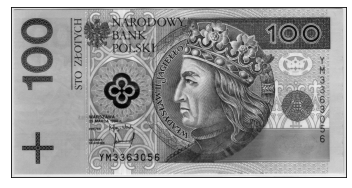

In [15]:
array2plt(recreate_img('01234567')) # == array2plt(I)